
# Feature Importance

**Feature importance** refers to a class of techniques for assigning scores to input features (independent variables) to a predictive model that indicates the relative importance of each feature when making a prediction.<br>

Feature importance scores can be calculated for both regression and classification problems.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

- **Better understanding the data**: the relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.
- **Better understanding a model**: most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction.
- **Reducing the number of input features**: the importance scores can be used to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of **feature selection**. **Feature selection** can simplify the problem that is being modeled, speed up the modeling process, and potentially, improve the performance of the model. Feature importance scores can be fed to a wrapper model, such as the **`SelectFromModel`** class, to perform feature selection.


There are many ways to calculate feature importance scores and many models that can be used for this purpose. <br>
The three main ways of doing so are:

1. Feature importance from model coefficients.
2. Feature importance from decision trees.
3. Feature importance from permutation testing.

## Coefficients as Feature Importance

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.<br>

Examples include **linear regression**, **logistic regression**, **ridge regression**, ...<br>

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. <br>
These coefficients can be used directly as a type of feature importance score.<br>
Notice that the coefficients can be both positive and negative.<br>

**Note**: this assumes that the input variables have the same scale or have been scaled prior to fitting a model.

In the following example, the sample data is relevant to the oil & gas industry. It is originally from Dr. Michael Pyrcz, petroleum engineering professor at the University of Texas at Austin. 

Description of headers:

    Well : well index
    Por : well average porosity (%)
    Perm : permeability (mD)
    AI : accoustic impedance (kg/m2s*10^6)
    Brittle : brittleness ratio (%)
    TOC : total organic carbon (%)
    VR : vitrinite reflectance (%)

    Prod : gas production per day (MCFD) - Dependent Variable or Target

We have six features (Por, Perm, AI, Brittle, TOC, VR) to predict the response variable (Prod). 

LinearRegression()

         Coefficient
Well       -4.198389
Por       697.587396
Brittle   363.668436
Perm      186.111401
TOC         8.035047
VR        204.031162
AI       -159.745702


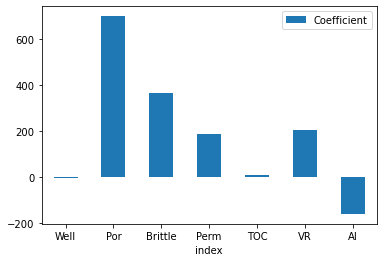

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

file = 'datasets/unconv_MV_v5.csv'
df = pd.read_csv(file)

features = ['Well', 'Por', 'Brittle', 'Perm', 'TOC', 'VR', 'AI']
target = 'Prod'

X_org = df[features]
y = df[target]

scaler = StandardScaler()
X = scaler.fit_transform(X_org)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# To see the coefficients:              
coeff_df = pd.DataFrame(regressor.coef_, X_org.columns, columns=['Coefficient'])
print(coeff_df)
coeff_df.reset_index(inplace=True)
ax = coeff_df.plot.bar(x='index', y='Coefficient', rot=0)

In the above example, the scores suggest that the model found 2 features more important than the others: `Por`  is the most important feature, and `Brittle` is the second most important feature.

## Decision Tree Feature Importance

**Decision tree** algorithms like classification and regression trees (**CART**) offer importance scores based on the reduction in the criterion used to select split points, like **Gini** or **entropy**.<br>

This same approach can be used for **ensembles of decision trees**, such as the **random forest** and **stochastic gradient boosting** algorithms.

We can use the **CART algorithm** for feature importance implemented in `scikit-learn` as the **`DecisionTreeRegressor`** and **`DecisionTreeClassifier`** classes.

After being fit, the model provides a **`feature_importances_`** property that can be accessed to retrieve the relative importance scores for each input feature.



DecisionTreeRegressor()

Feature:Well    , Score: 0.00308
Feature:Por     , Score: 0.81042
Feature:Brittle , Score: 0.14191
Feature:Perm    , Score: 0.01168
Feature:TOC     , Score: 0.01020
Feature:VR      , Score: 0.01490
Feature:AI      , Score: 0.00781


<BarContainer object of 7 artists>

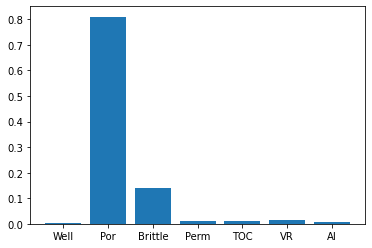

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

file = 'datasets/unconv_MV_v5.csv'
df = pd.read_csv(file)

features = ['Well', 'Por', 'Brittle', 'Perm', 'TOC', 'VR', 'AI']
target = 'Prod'

X_org = df[features]
y = df[target]

scaler = StandardScaler()
X = scaler.fit_transform(X_org)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature:{features[i]:8s}, Score: {v:.5f}')
# plot feature importance
plt.bar(features, importance)

The results suggest 2 of the 7 features as being important to prediction.

## Permutation Feature Importance

**Permutation** feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

Permutation feature selection can be used via the **`permutation_importance()`** function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

KNeighborsRegressor()

Feature:Well    , Score: 5102.46220
Feature:Por     , Score: 352331.19240
Feature:Brittle , Score: 200536.17657
Feature:Perm    , Score: 162400.44226
Feature:TOC     , Score: 55608.18140
Feature:VR      , Score: 43812.65470
Feature:AI      , Score: 34777.39108


<BarContainer object of 7 artists>

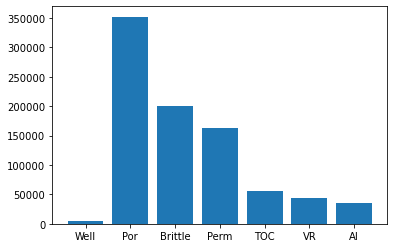

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

file = 'datasets/unconv_MV_v5.csv'
df = pd.read_csv(file)

features = ['Well', 'Por', 'Brittle', 'Perm', 'TOC', 'VR', 'AI']
target = 'Prod'

X_org = df[features]
y = df[target]

scaler = StandardScaler()
X = scaler.fit_transform(X_org)

model = KNeighborsRegressor()
# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature:{features[i]:8s}, Score: {v:.5f}')
# plot feature importance
plt.bar(features, importance)


## Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.<br>

We can use the **`SelectFromModel`** class to define both the model we wish to calculate importance scores and the number `n` of features to select.<br> We can then apply the method as a transform to select a subset of `n` most important features from the dataset.<br>
<br>

Example: <br>
    `fs = SelectFromModel(DecisionTreeRegressor(), max_features=3, threshold=-np.inf)`

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel

file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)

features = ['Well', 'Por', 'Brittle', 'Perm', 'TOC', 'VR', 'AI']
target = 'Prod'

X_org = df[features]
y = df[target]

scaler = StandardScaler()
X = scaler.fit_transform(X_org)

# feature selection
def select_features(X_train, y_train):
	# configure to select a subset of features
	fs = SelectFromModel(DecisionTreeRegressor(), max_features=4, threshold=-np.inf)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	return X_train_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# feature selection
X_sel, fs = select_features(X, y)
X_train_sel=fs.transform(X_train)


model = LinearRegression()
model.fit(X_train_sel, y_train)

# evaluate predictions
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(model, X_sel, y, cv=kfold, scoring=scoring)
print(results)
print(f"R2: {results.mean():.3f} ({results.std():.3f})")

LinearRegression()

[0.95127901 0.88516033 0.9591793  0.95616915 0.97761087 0.96107176
 0.94428716 0.91395282 0.92630968 0.93258852]
R2: 0.941 (0.026)
